In [1]:
%pip install -q matplotlib pandas tqdm hyperactive

Note: you may need to restart the kernel to use updated packages.


In [5]:
from basicpy import BaSiC, datasets
from matplotlib import pyplot as plt
import numpy as np
from hyperactive import Hyperactive
import pandas as pd
from tqdm import tqdm

plt.rcParams["font.family"] = ""

In [2]:
brain_wsi_image = datasets.wsi_brain()

In [3]:
brain_wsi_image.shape

(63, 128, 128)

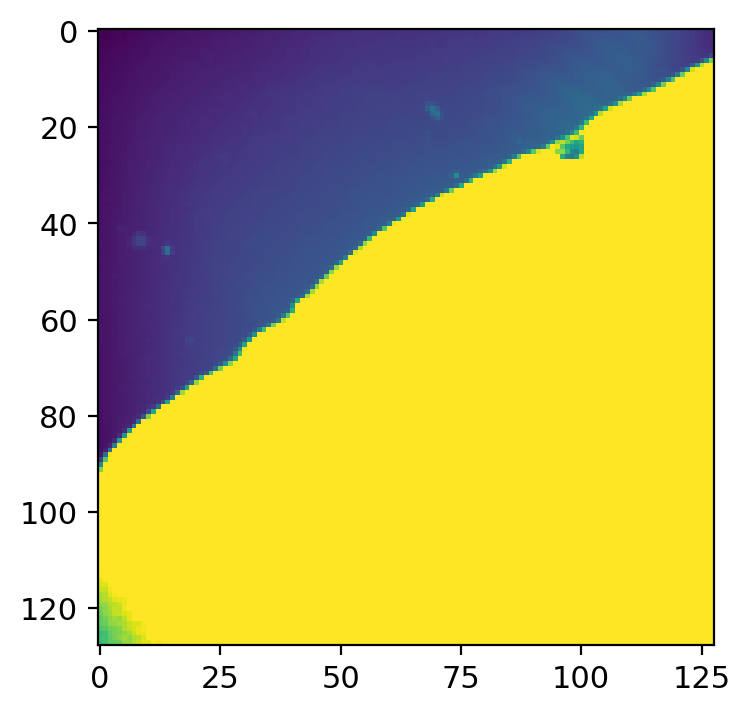

In [6]:
plt.imshow(brain_wsi_image[11], vmax=3000)

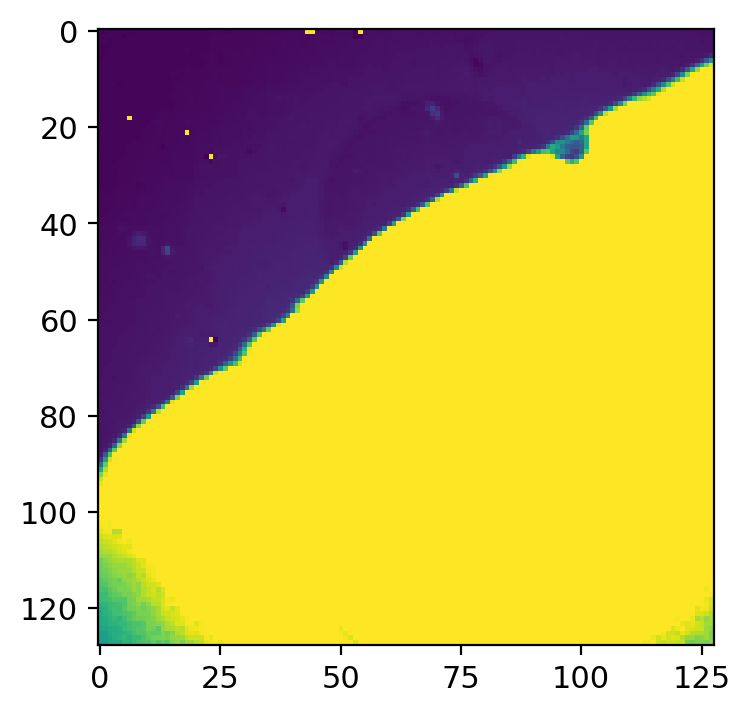

In [7]:
plt.imshow(brain_wsi_image[11] - brain_wsi_image[0], vmax=3000, vmin=0)

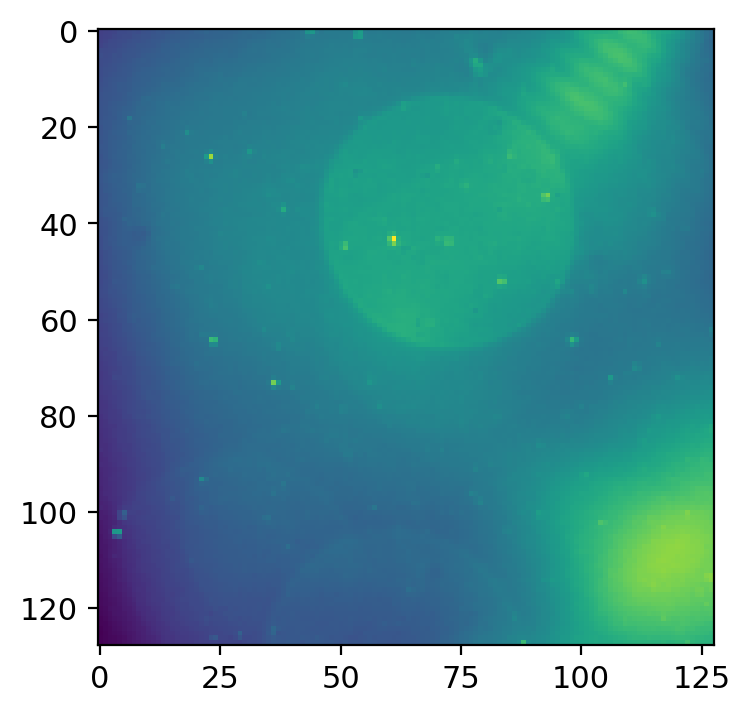

In [8]:
plt.imshow(brain_wsi_image[0])

In [14]:
flatfields_wsi = []
darkfields_wsi = []
records = []

for smoothness_flatfield in [0.1, 0.5, 1, 5, 10]:
    for smoothness_darkfield in [0, 0.1, 0.5, 1, 5, 10]:
        for sparse_cost_darkfield in tqdm(np.array([0, 0.1, 0.5, 1, 5, 10]) * 0.01):
            basic = BaSiC(
                smoothness_flatfield=smoothness_flatfield,
                smoothness_darkfield=smoothness_darkfield,
                sparse_cost_darkfield=sparse_cost_darkfield,
                get_darkfield=True,
            )
            try:
                basic.fit(brain_wsi_image)
                flatfields_wsi.append(basic.flatfield)
                darkfields_wsi.append(basic.darkfield)
                records.append(
                    {
                        "smoothness_flatfield": smoothness_flatfield,
                        "smoothness_darkfield": smoothness_darkfield,
                        "sparse_cost_darkfield": sparse_cost_darkfield,
                    }
                )
            except RuntimeError:
                pass
conditions_df = pd.DataFrame.from_records(records)

100%|██████████| 6/6 [06:37<00:00, 66.21s/it]


In [15]:
conditions_df

smoothness_flatfield  smoothness_darkfield  sparse_cost_darkfield
0                     0.1                   0.0                  0.000
1                     0.1                   0.0                  0.001
2                     0.1                   0.0                  0.005
3                     0.1                   0.0                  0.010
4                     0.1                   0.0                  0.050
..                    ...                   ...                    ...
123                  10.0                  10.0                  0.001
124                  10.0                  10.0                  0.005
125                  10.0                  10.0                  0.010
126                  10.0                  10.0                  0.050
127                  10.0                  10.0                  0.100

[128 rows x 3 columns]

In [16]:
np.save("wsi_flatfields.npy", flatfields_wsi)
np.save("wsi_darkfields.npy", darkfields_wsi)
conditions_df.to_csv("wsi_conditions_df.csv")

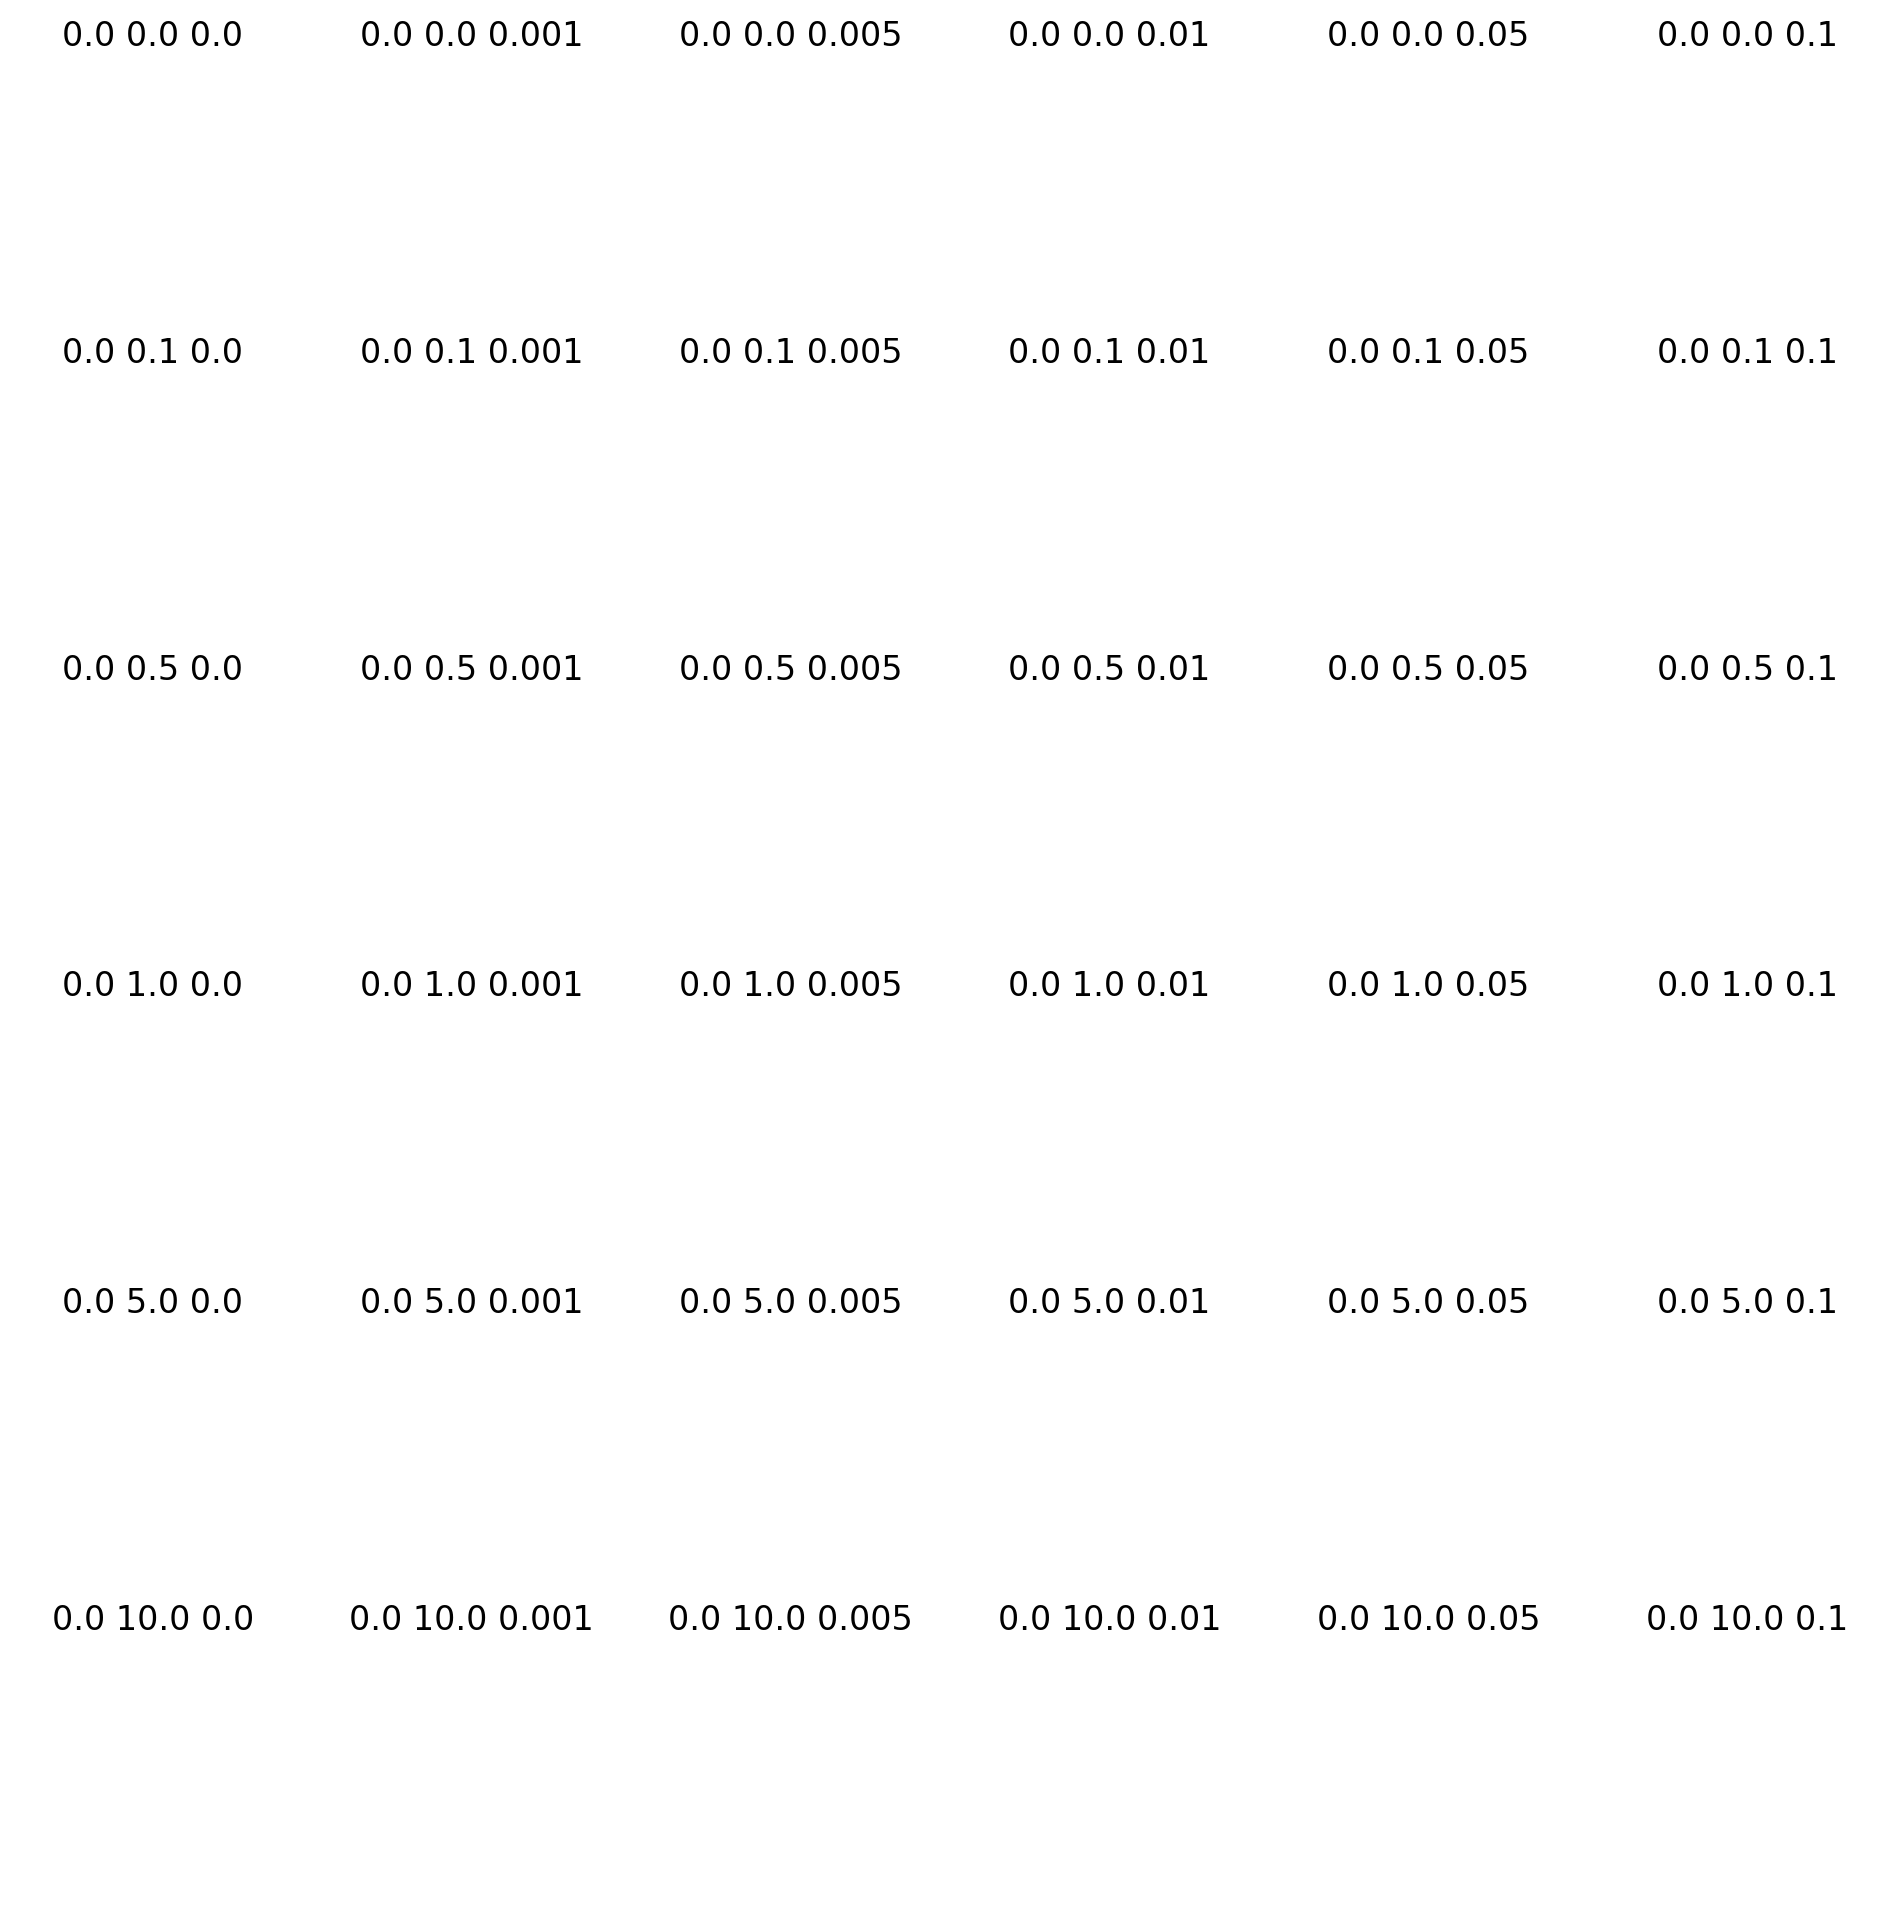

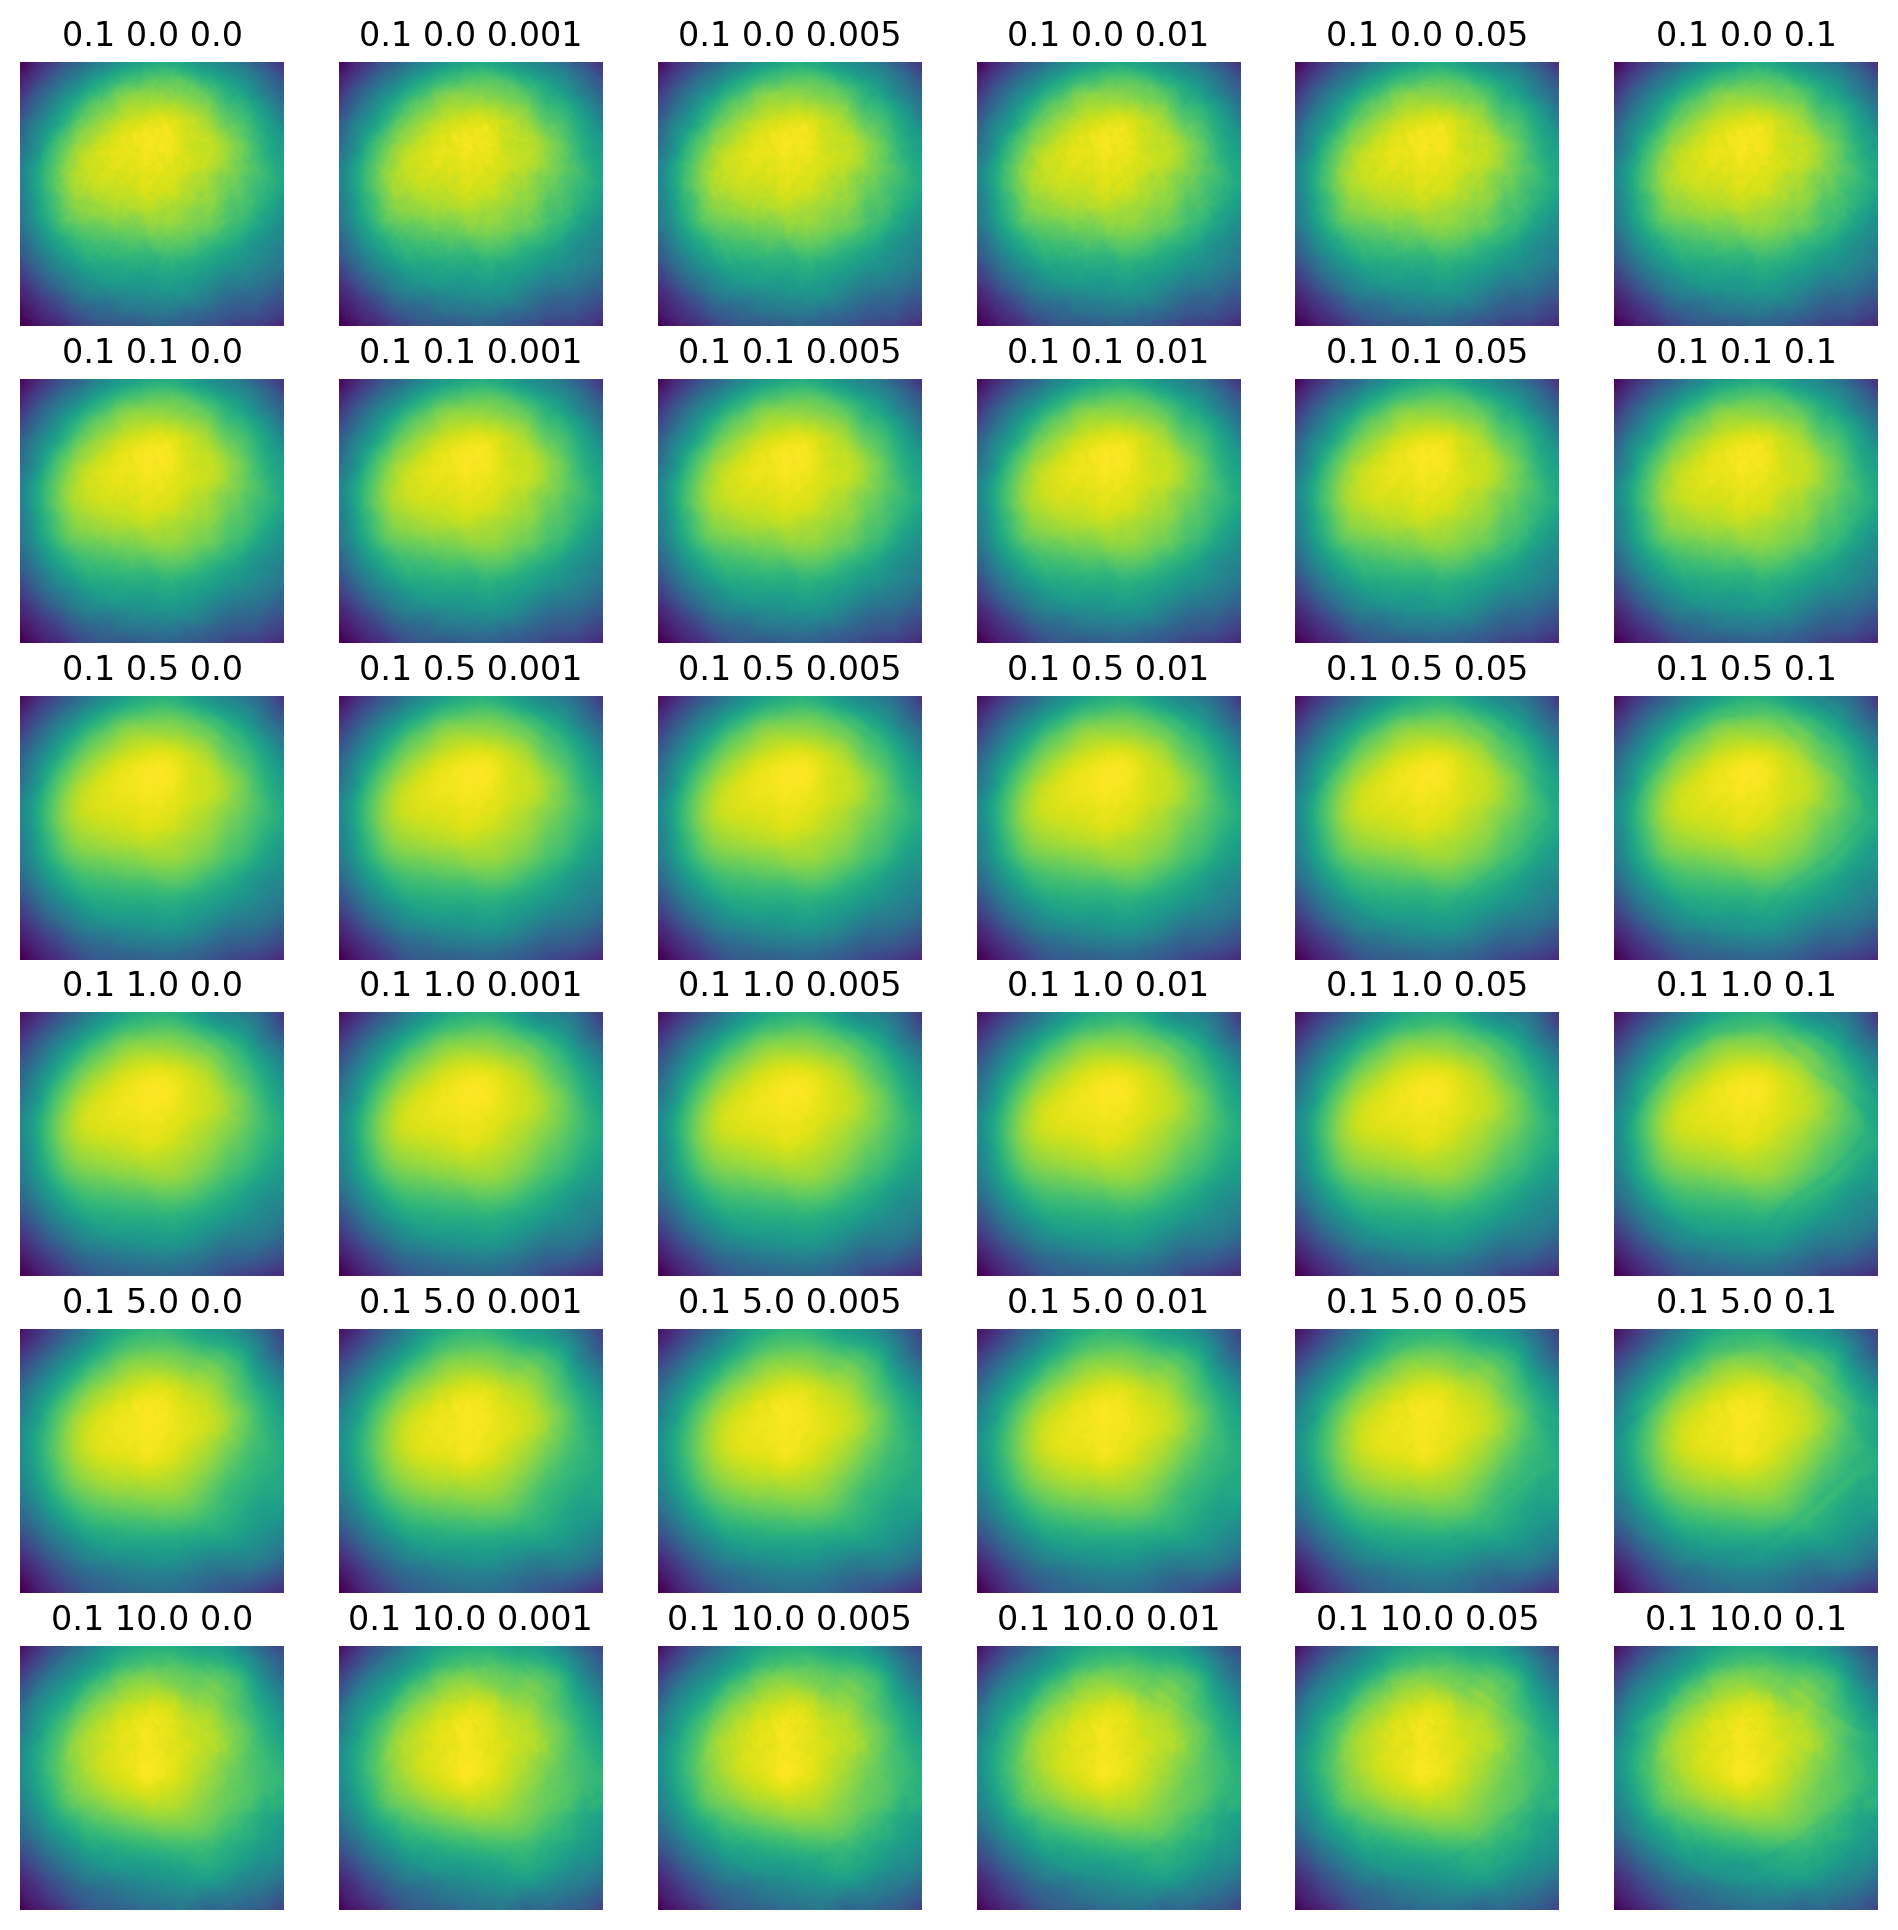

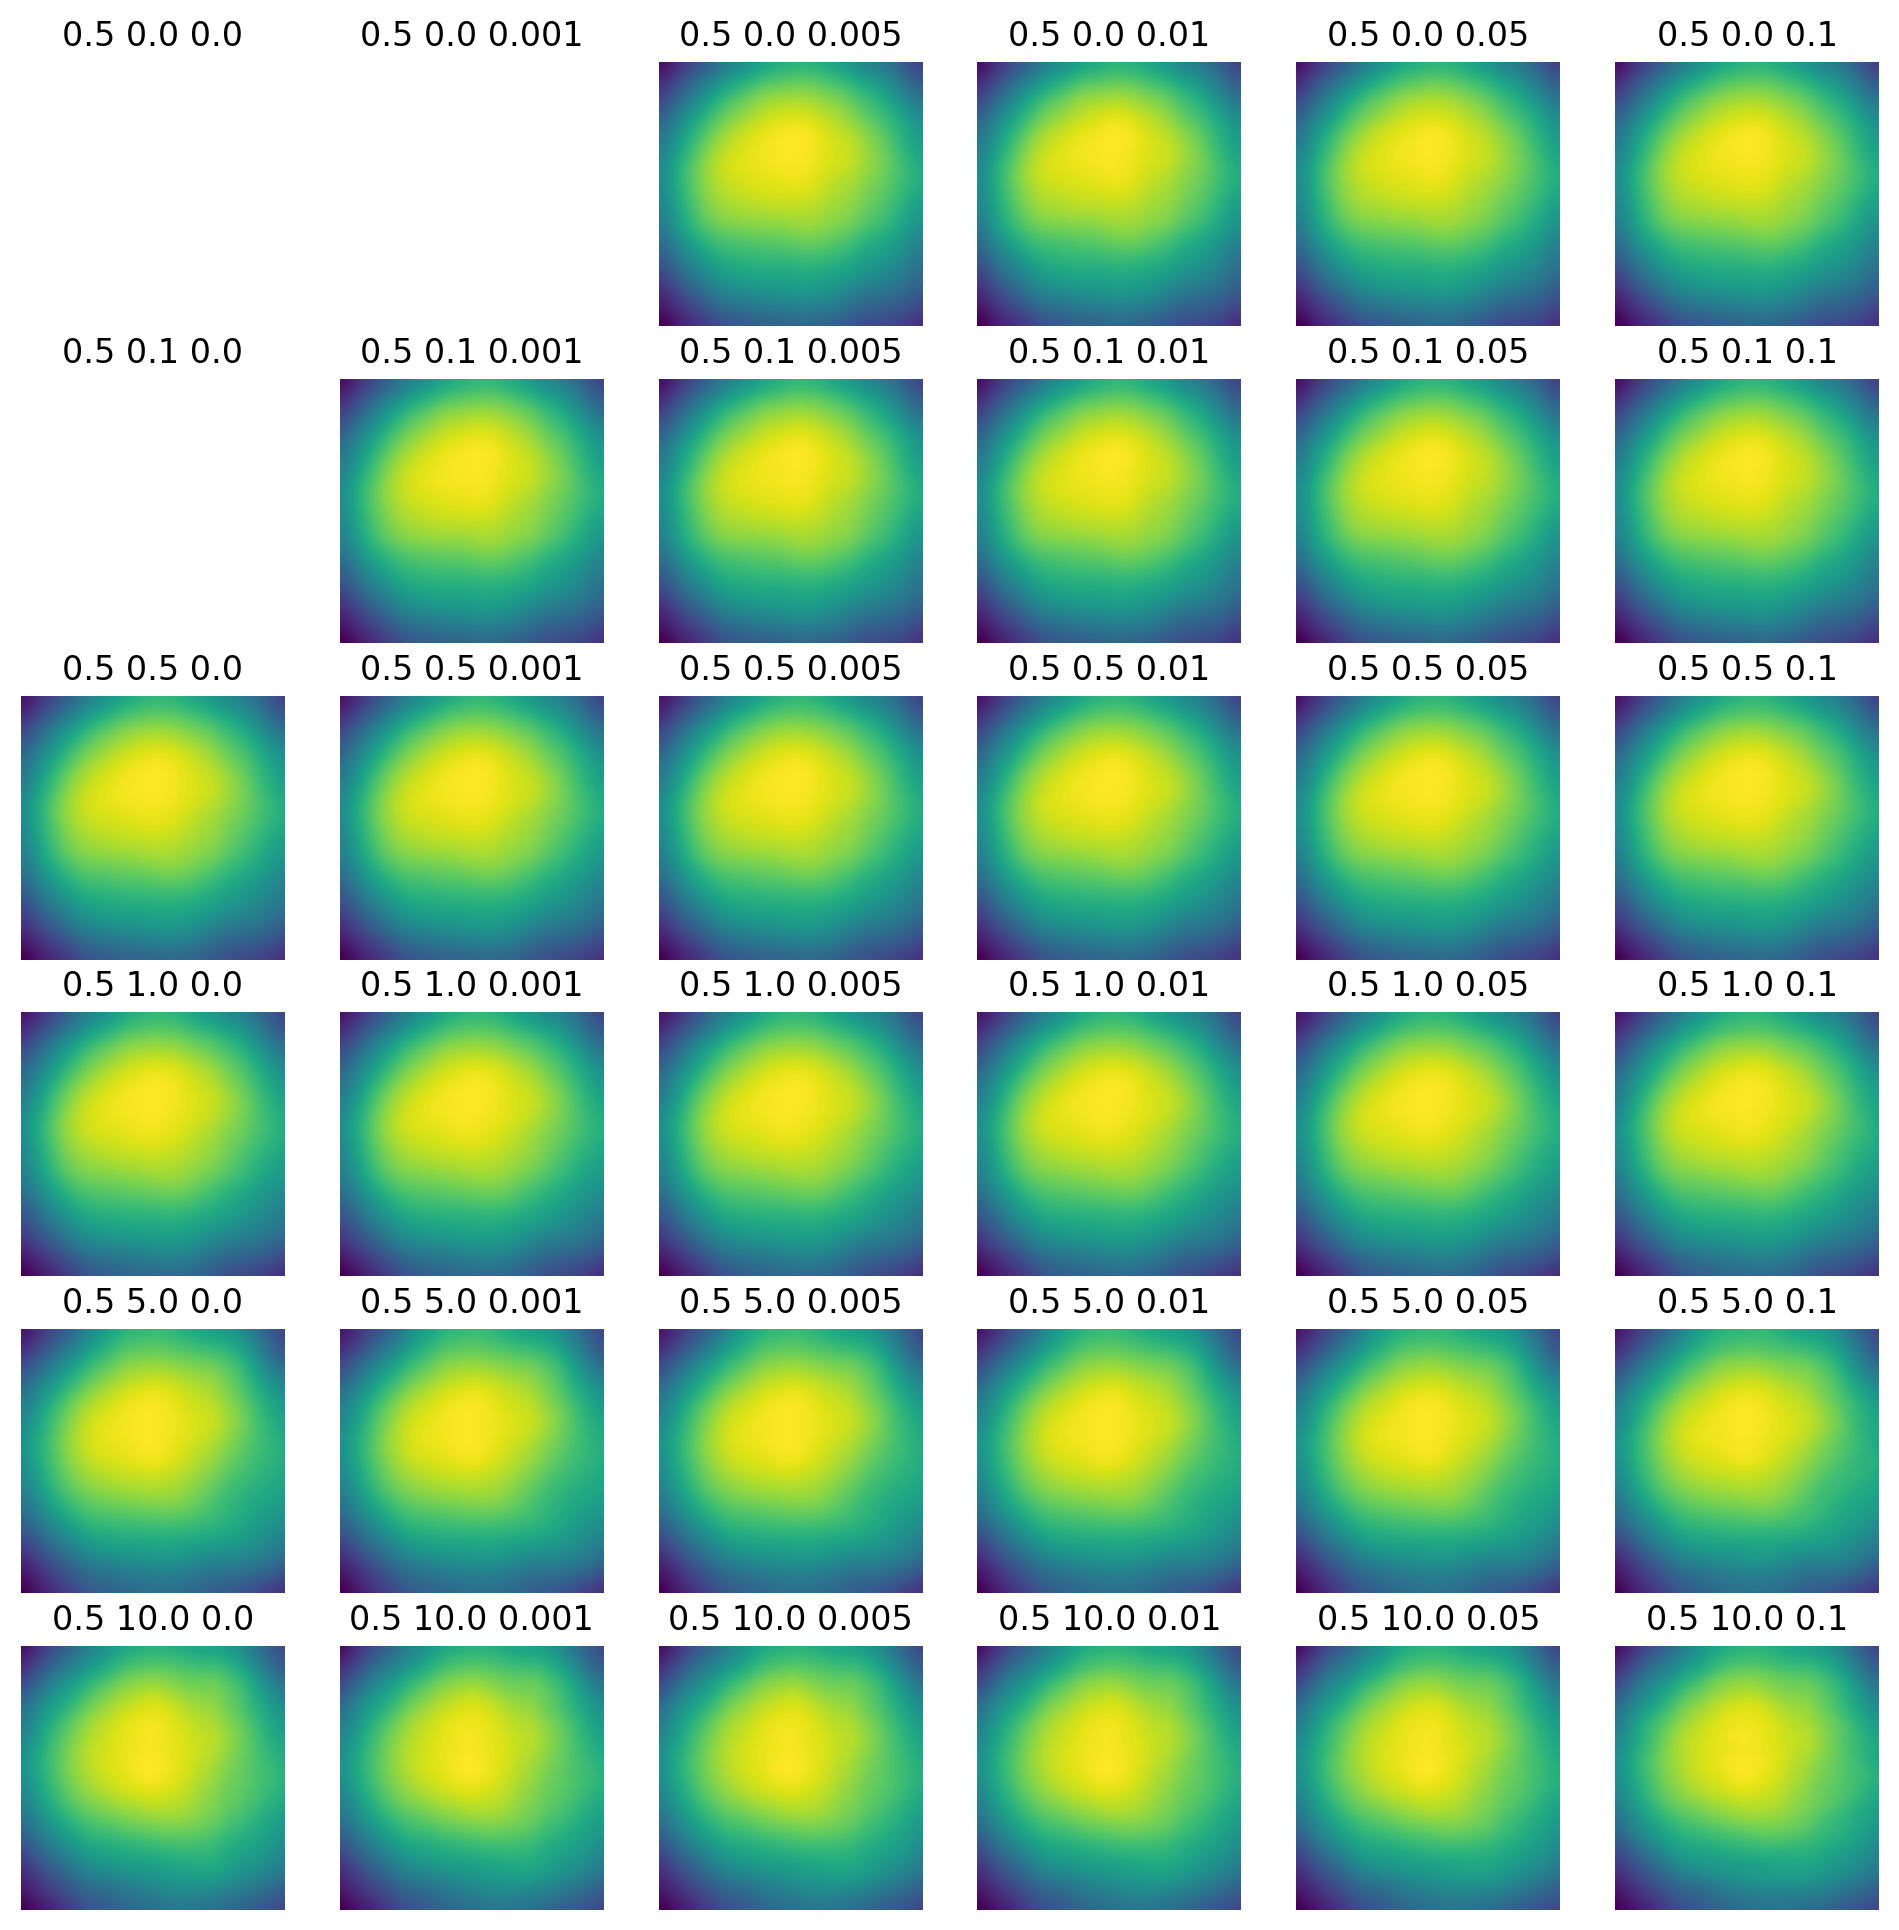

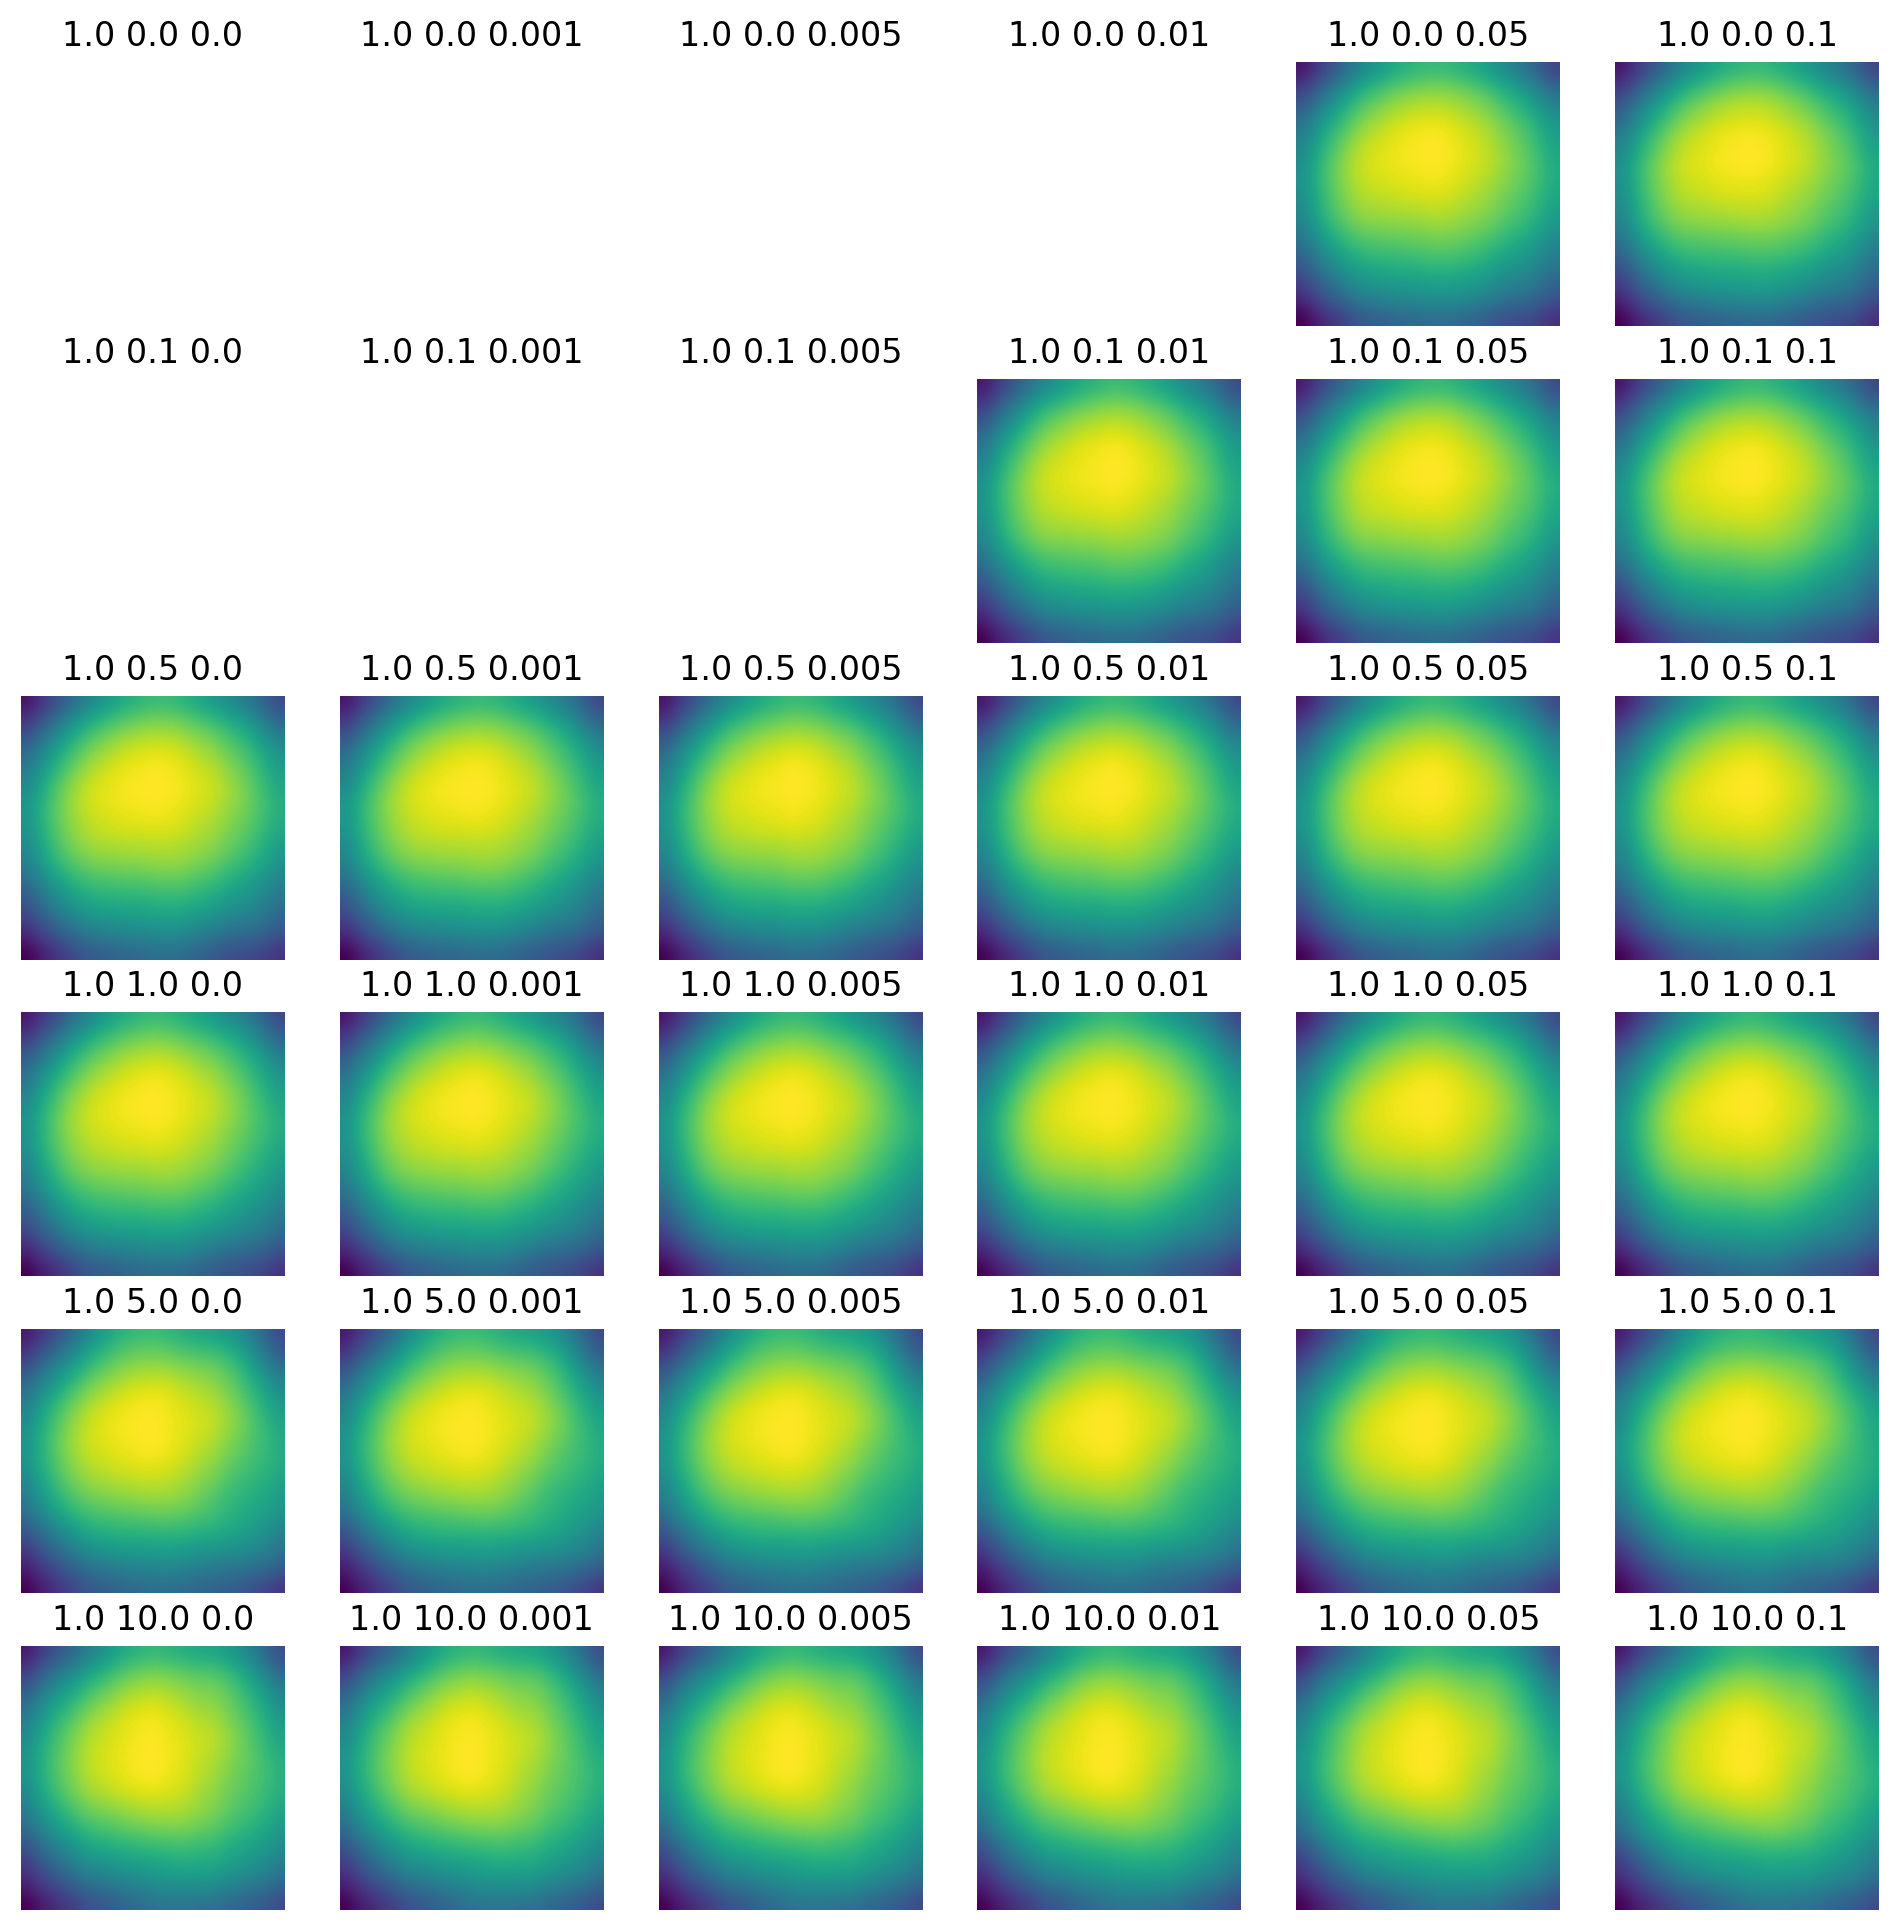

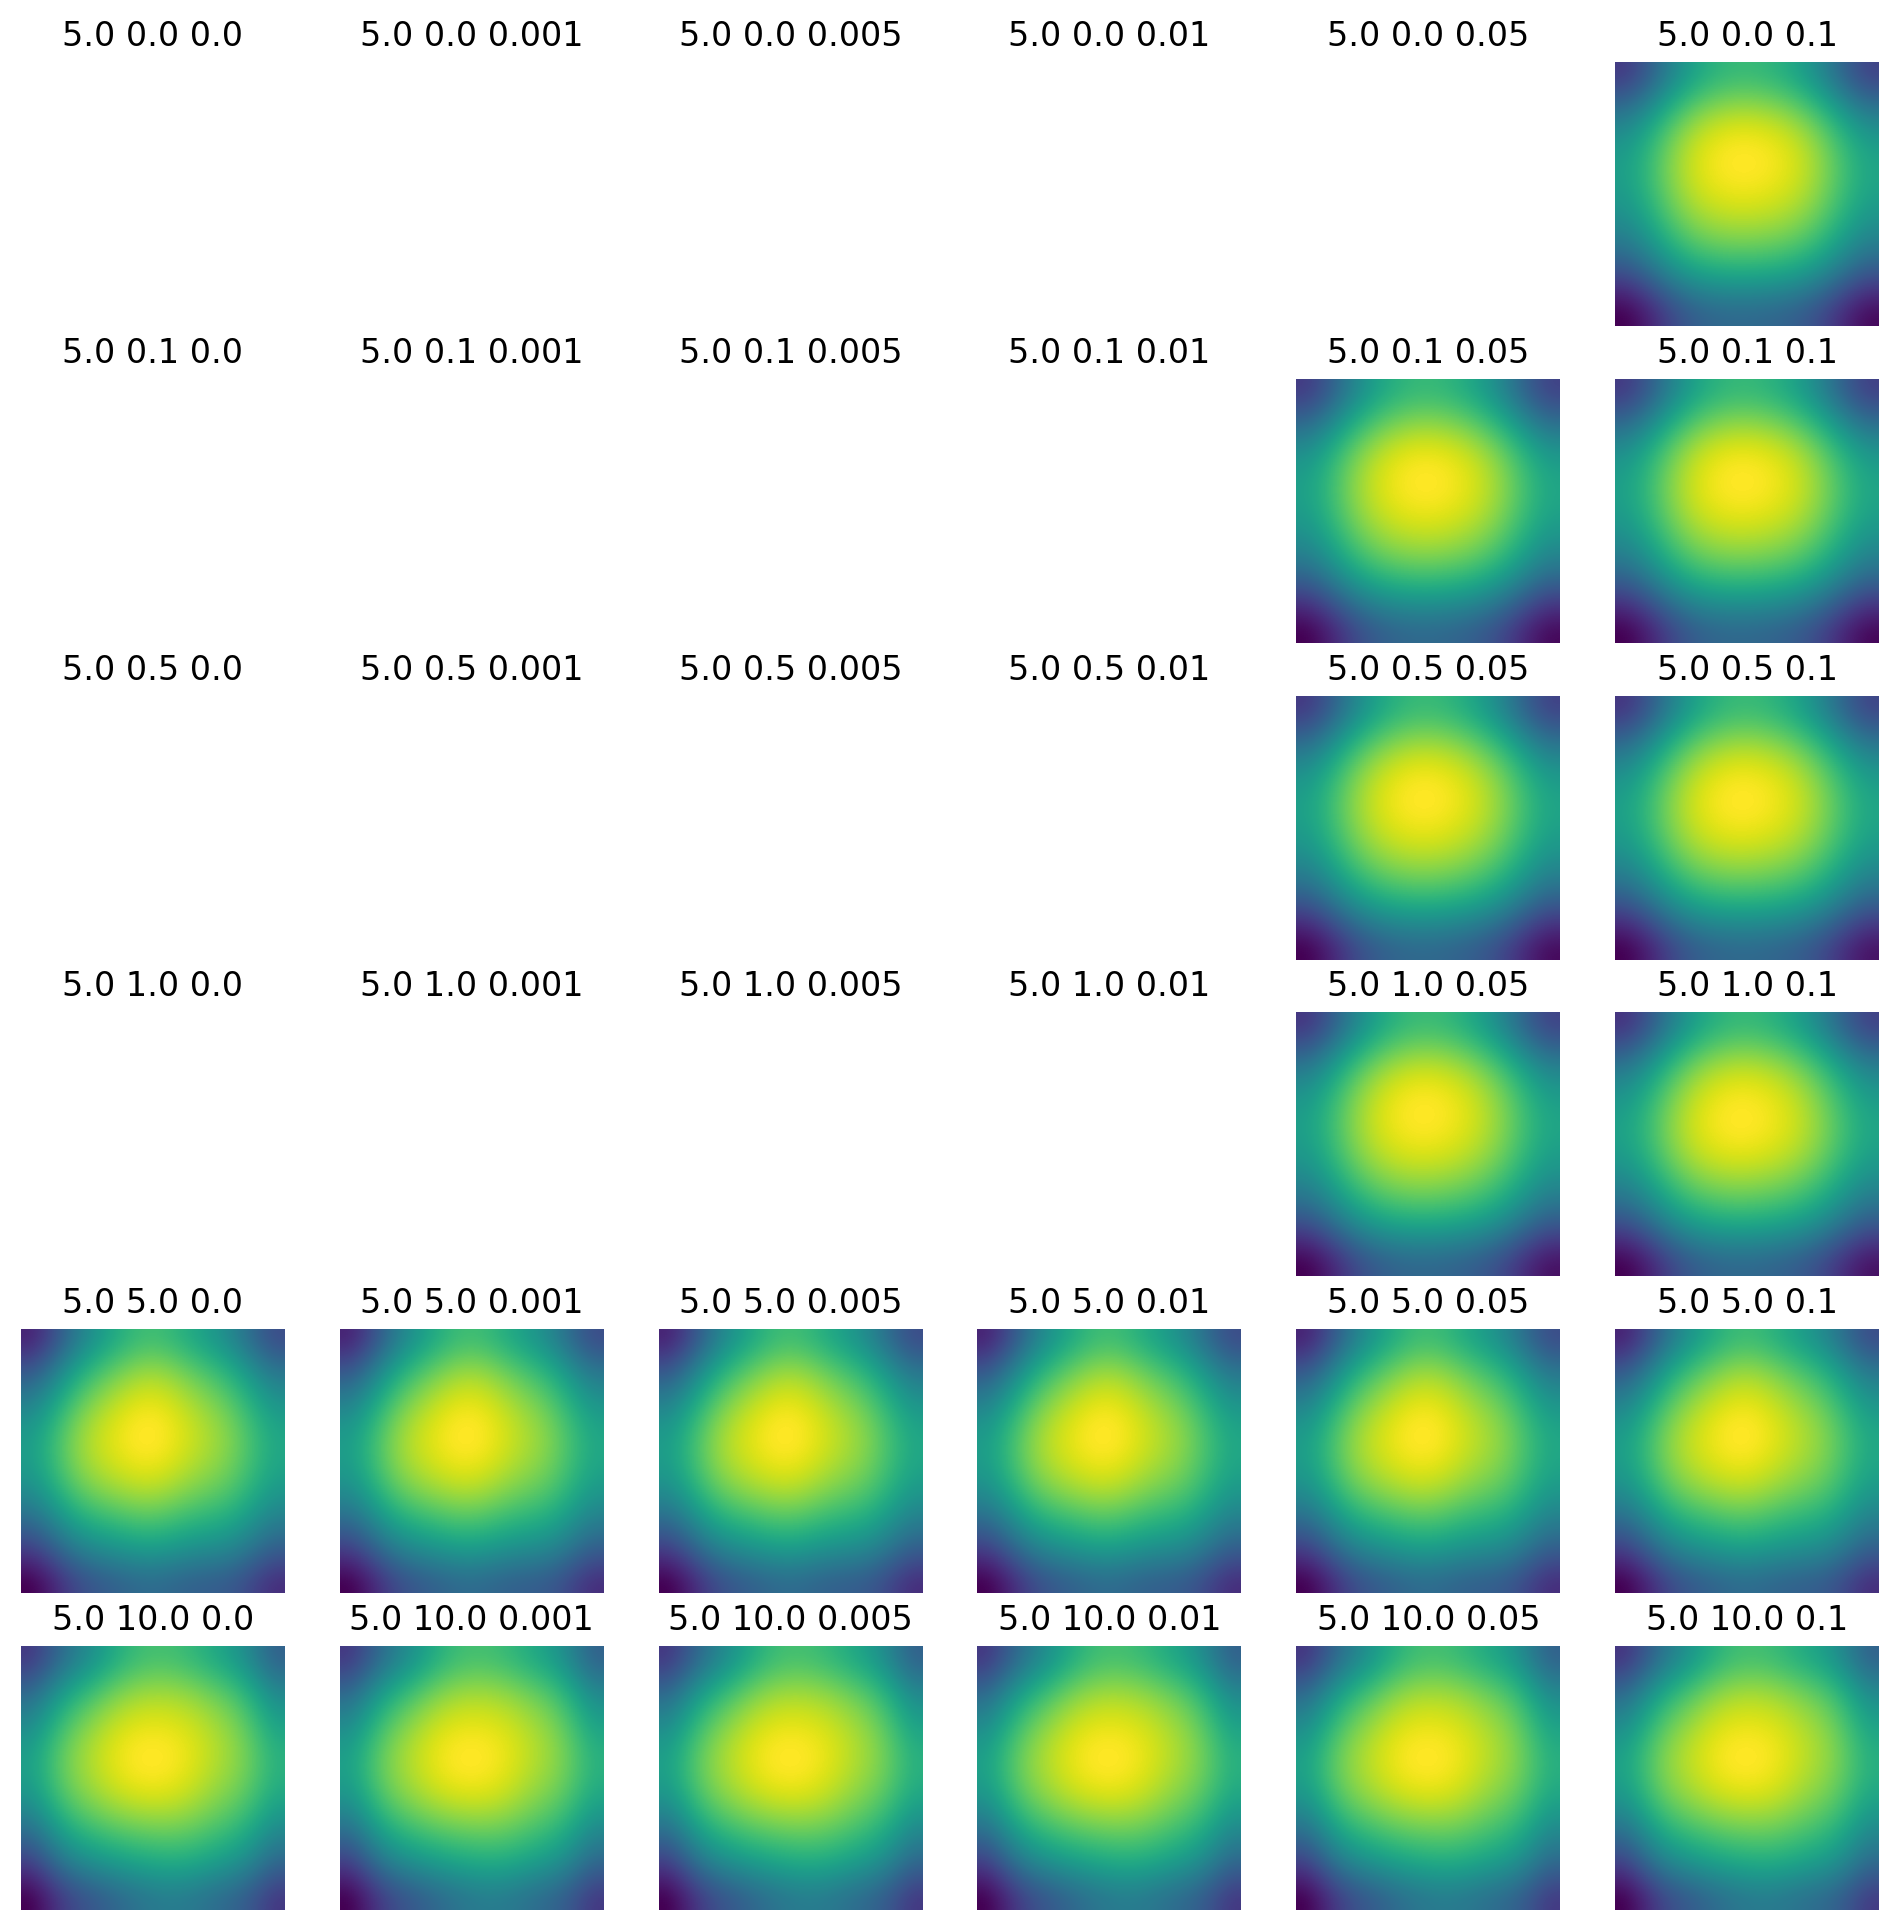

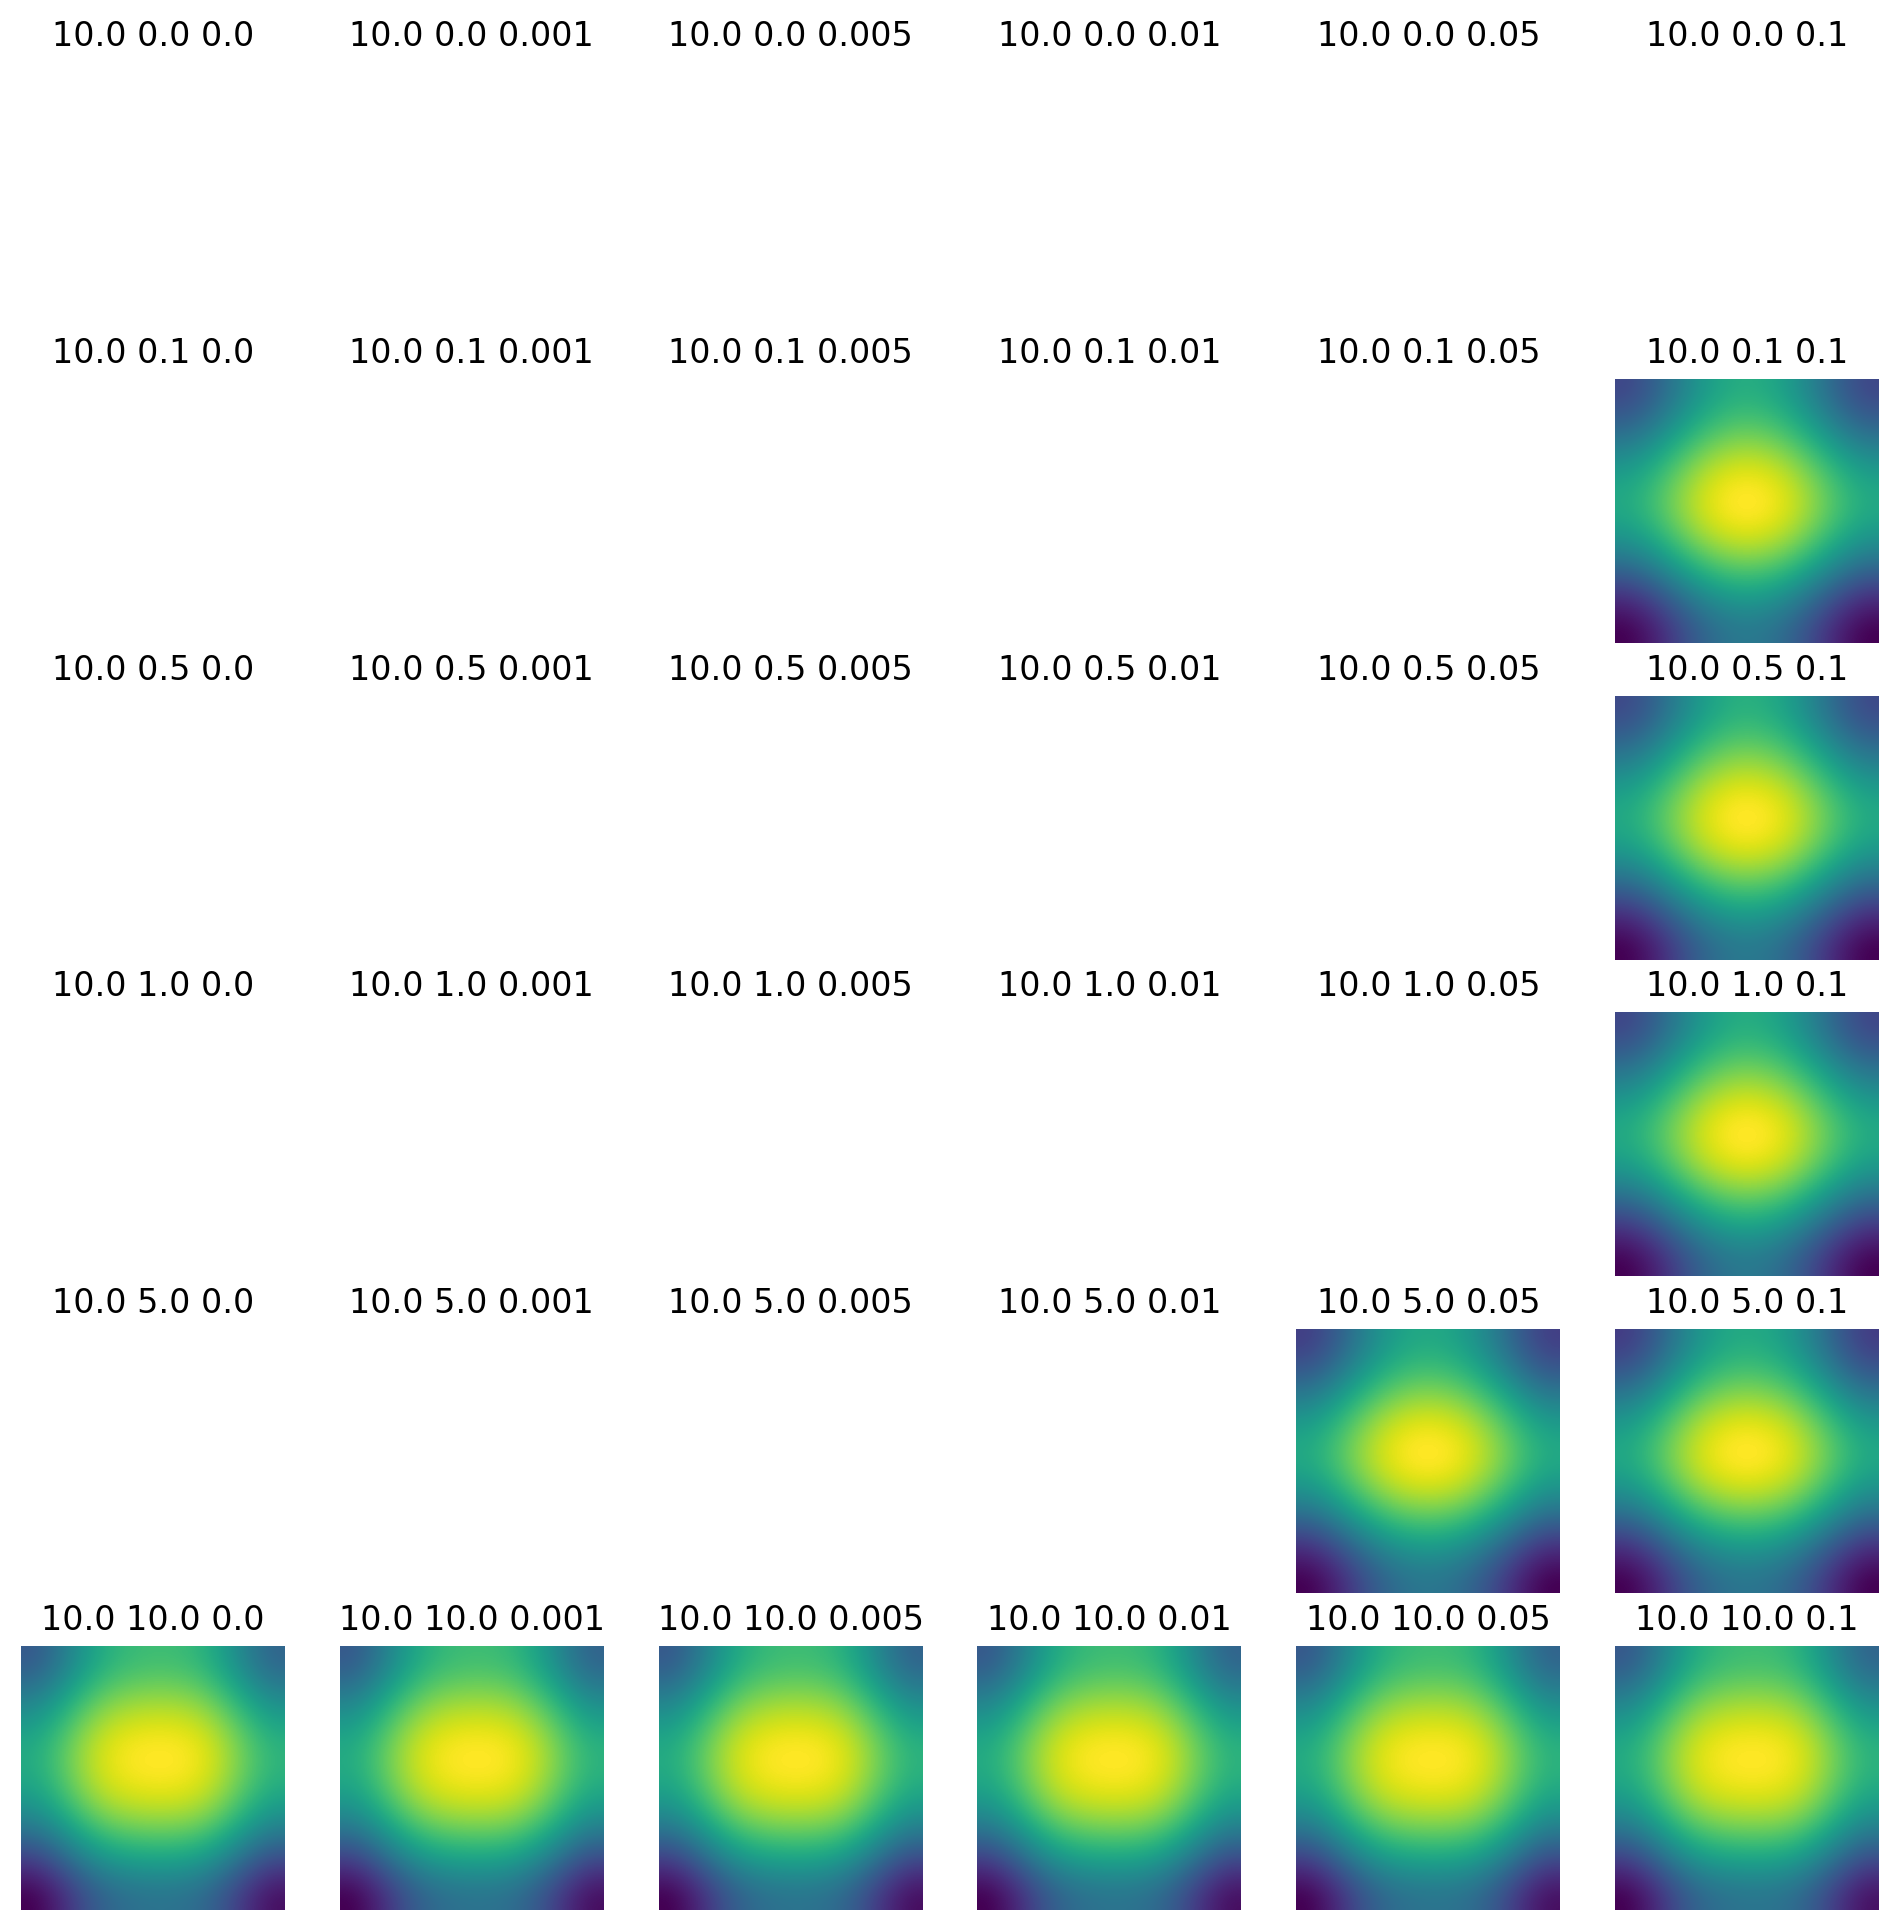

In [17]:
smoothness_flatfields = conditions_df["smoothness_darkfield"].unique()
smoothness_darkfields = conditions_df["smoothness_darkfield"].unique()
sparse_cost_darkfields = conditions_df["sparse_cost_darkfield"].unique()

for smoothness_flatfield in smoothness_flatfields:
    fig, axes = plt.subplots(
        len(smoothness_darkfields), len(sparse_cost_darkfields), figsize=(12, 12)
    )
    for i, smoothness_darkfield in enumerate(smoothness_darkfields):
        for j, sparse_cost_darkfield in enumerate(sparse_cost_darkfields):
            ax = axes[i][j]
            ax.set_title(
                f"{smoothness_flatfield} {smoothness_darkfield} {sparse_cost_darkfield}"
            )
            idx = np.where(
                (conditions_df["smoothness_flatfield"] == smoothness_flatfield)
                & (conditions_df["smoothness_darkfield"] == smoothness_darkfield)
                & (conditions_df["sparse_cost_darkfield"] == sparse_cost_darkfield)
            )
            if len(idx) > 0 and len(idx[0]) > 0:
                idx = idx[0][0]
                ax.imshow(flatfields_wsi[idx])
            ax.axis("off")

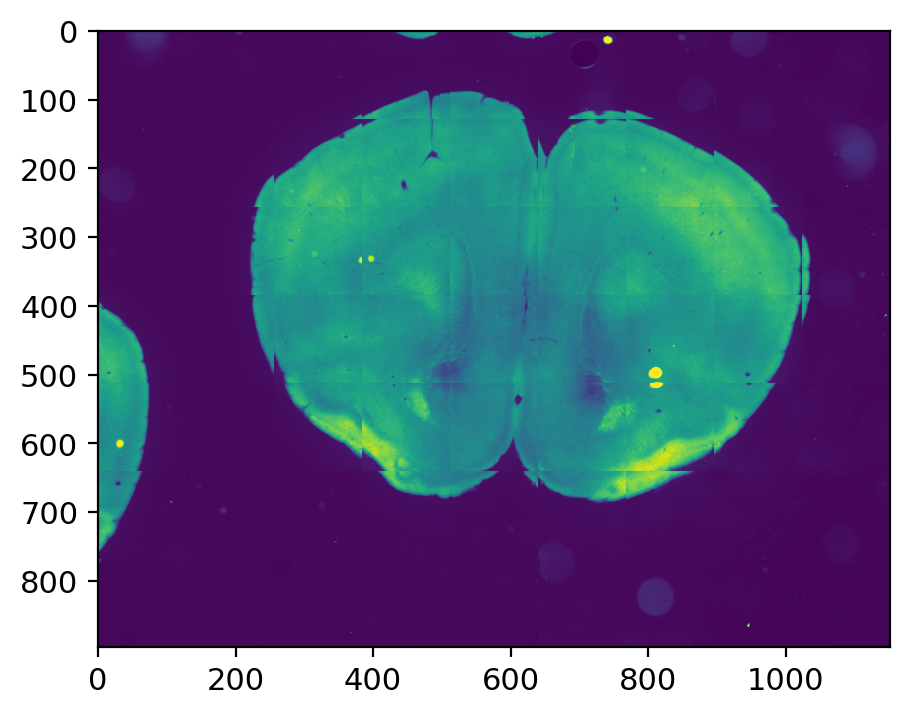

In [45]:
basic = BaSiC(
    smoothness_flatfield=0.1,
    smoothness_darkfield=0.1,
    sparse_cost_darkfield=0.001,
    get_darkfield=True,
)
basic.fit(brain_wsi_image)
img = basic.transform(brain_wsi_image)

img_composed = np.empty(
    (
        img.shape[1] * 7,
        img.shape[2] * 9,
    )
)

y = 0
x = img.shape[2] * 8

for j, im in enumerate(img):
    img_composed[y : y + img.shape[1], x : x + img.shape[2]] = im
    if (y // img.shape[2]) % 2 == 0:
        x -= img.shape[2]
        if x < 0:
            x = 0
            y += img.shape[1]
    else:
        x += img.shape[2]
        if x > img.shape[2] * 8:
            x = img.shape[2] * 8
            y += img.shape[1]
plt.imshow(img_composed, vmax=10000)

In [55]:
pu1_image = datasets.timelapse_pu1()

In [61]:
flatfields_pu1 = []
darkfields_pu1 = []
records = []

for smoothness_flatfield in [0.1, 0.5, 1, 5, 10]:
    for smoothness_darkfield in [0.1, 0.5, 1, 5, 10]:
        for sparse_cost_darkfield in tqdm(np.array([0.1, 0.5, 1, 5, 10]) * 0.01):
            basic = BaSiC(
                smoothness_flatfield=smoothness_flatfield,
                smoothness_darkfield=smoothness_darkfield,
                sparse_cost_darkfield=sparse_cost_darkfield,
                get_darkfield=True,
            )
            try:
                basic.fit(pu1_image)
                flatfields_pu1.append(basic.flatfield)
                darkfields_pu1.append(basic.darkfield)
                records.append(
                    {
                        "smoothness_flatfield": smoothness_flatfield,
                        "smoothness_darkfield": smoothness_darkfield,
                        "sparse_cost_darkfield": sparse_cost_darkfield,
                    }
                )
            except RuntimeError:
                pass
conditions_df = pd.DataFrame.from_records(records)

 20%|██        | 1/5 [03:02<12:10, 182.59s/it]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
 40%|████      | 2/5 [06:14<09:24, 188.02s/it]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
 60%|██████    | 3/5 [09:15<06:09, 184.70s/it]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
 80%|████████  | 4/5 [06:17<01:40, 100.13s/it]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
 20%|██        | 1/5 [02:14<08:57, 134.33s/it]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
 60%|██████    | 3/5 [03:37<02:27, 73.90s/it]Reweighting did not converge.
Single-step optimization did not converge at the last reweighting step.
 80%|████████  | 4/5 [06:44<01:58, 118.40s/it]Reweighting did not converge.
Single-step optimization did not conv

KeyboardInterrupt: 

IndexError: list index out of range

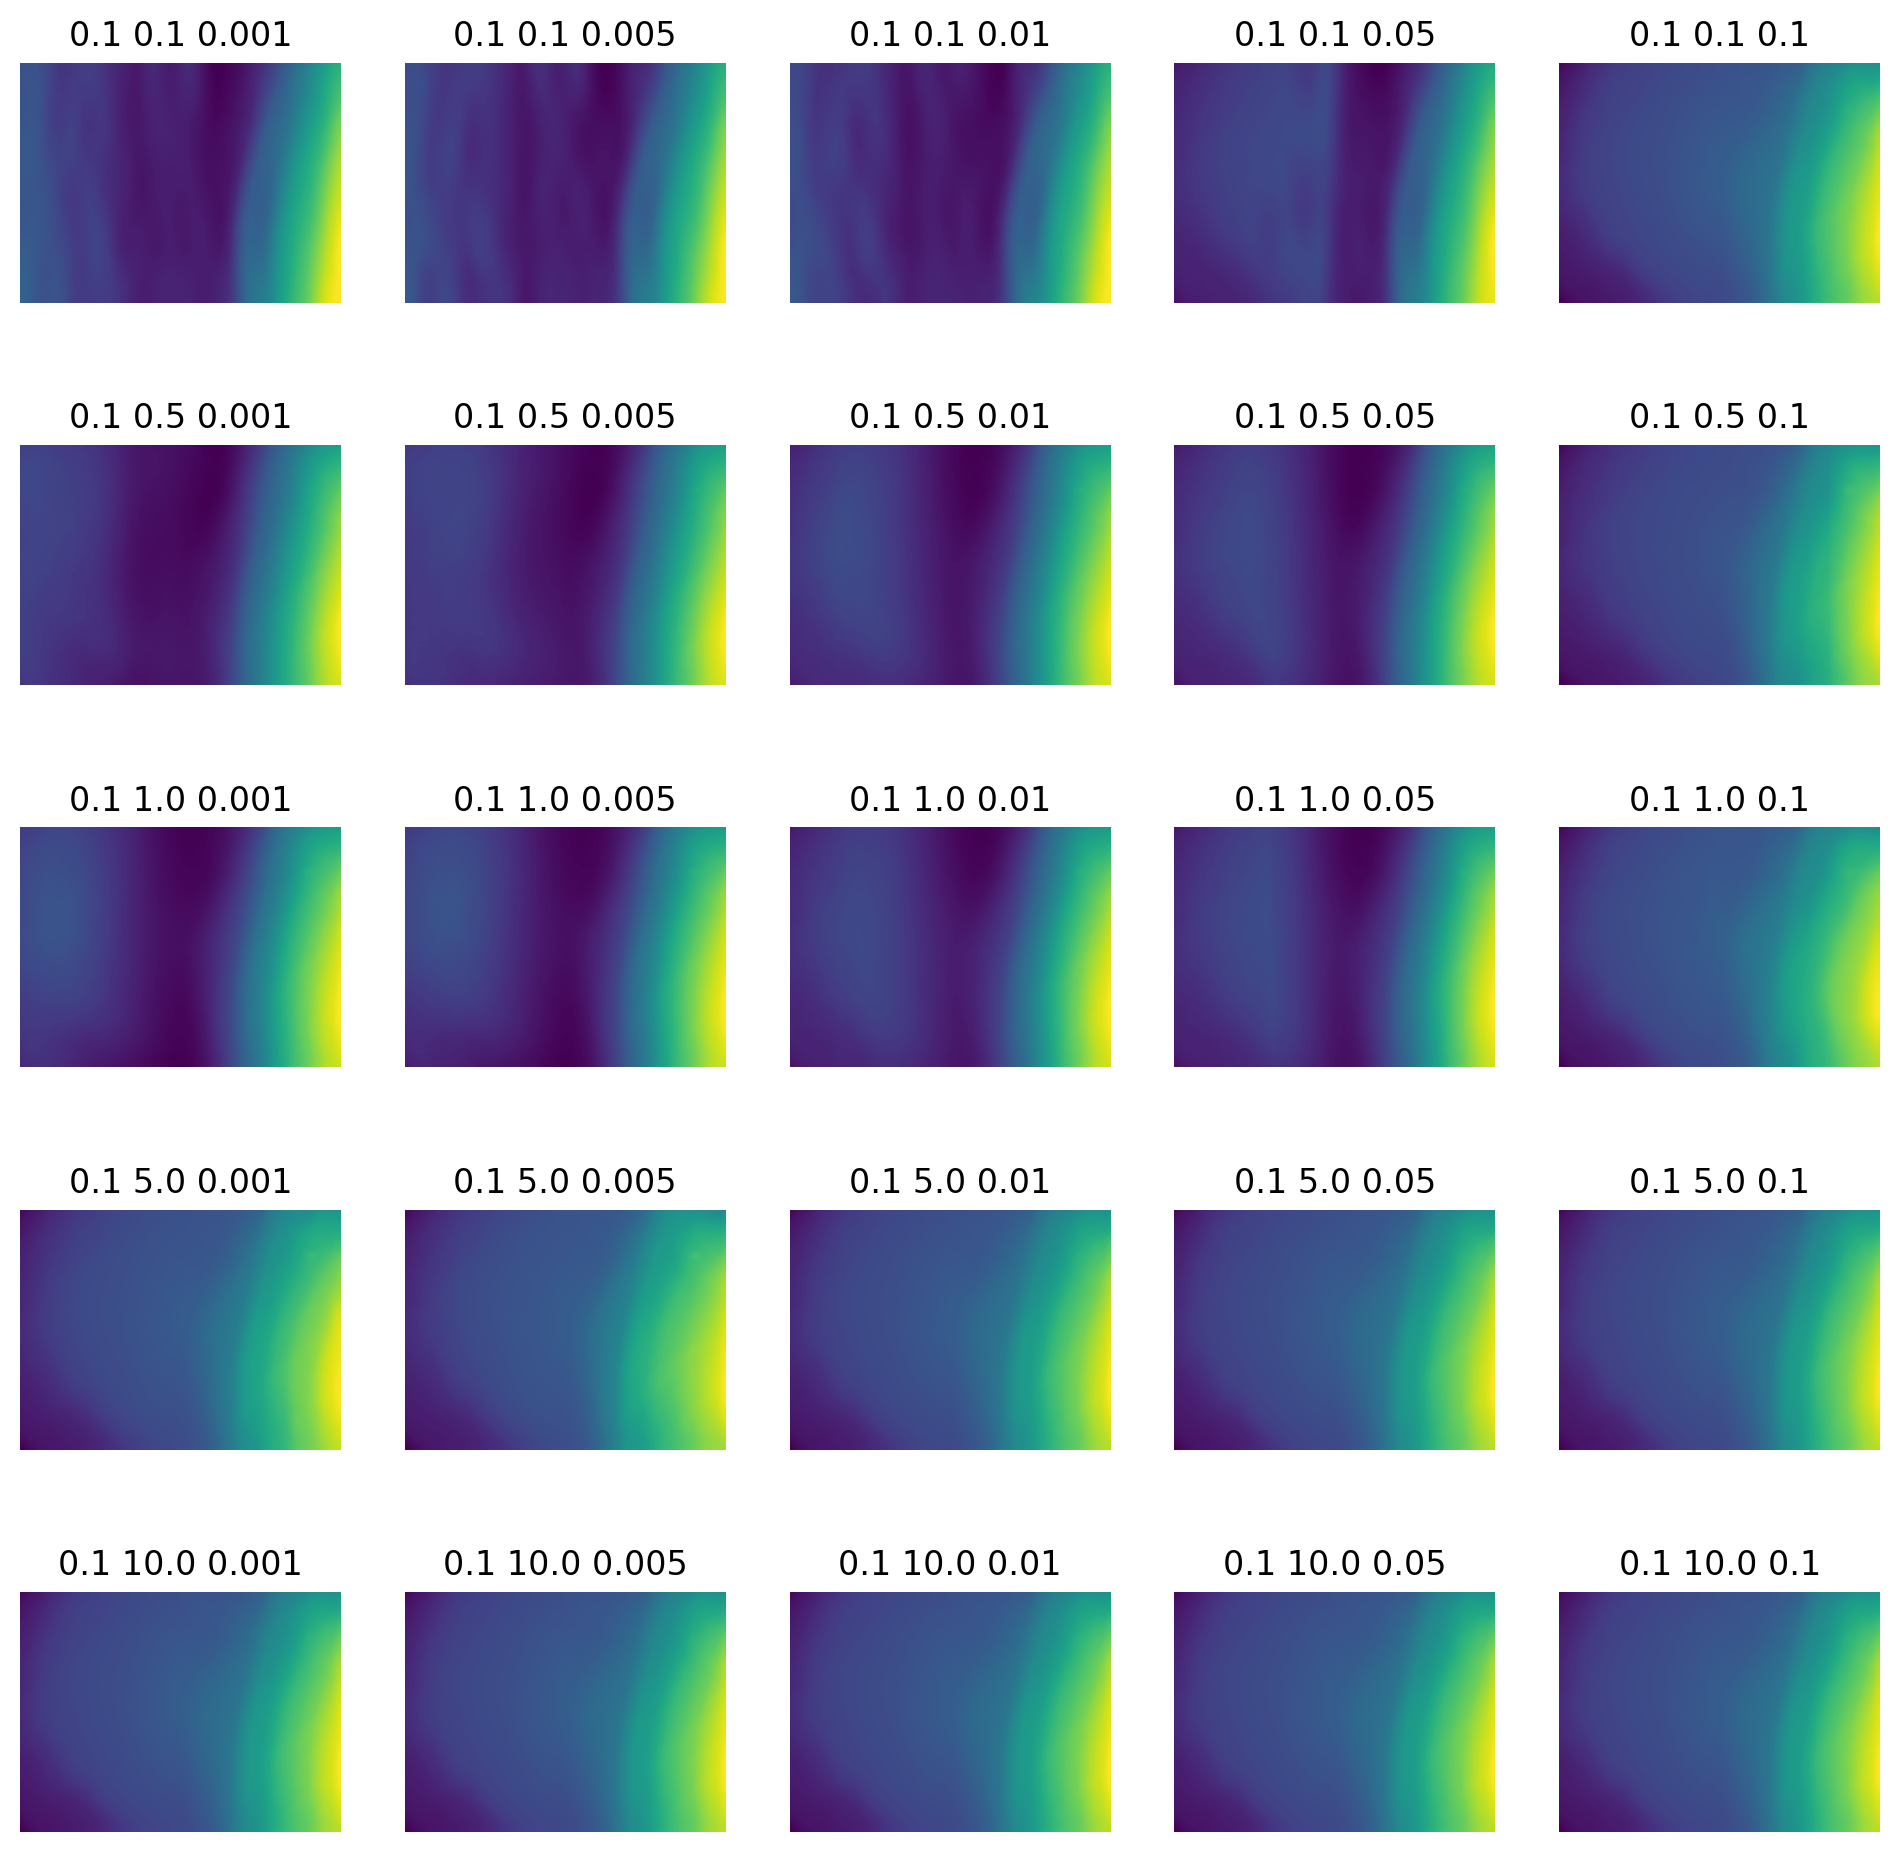

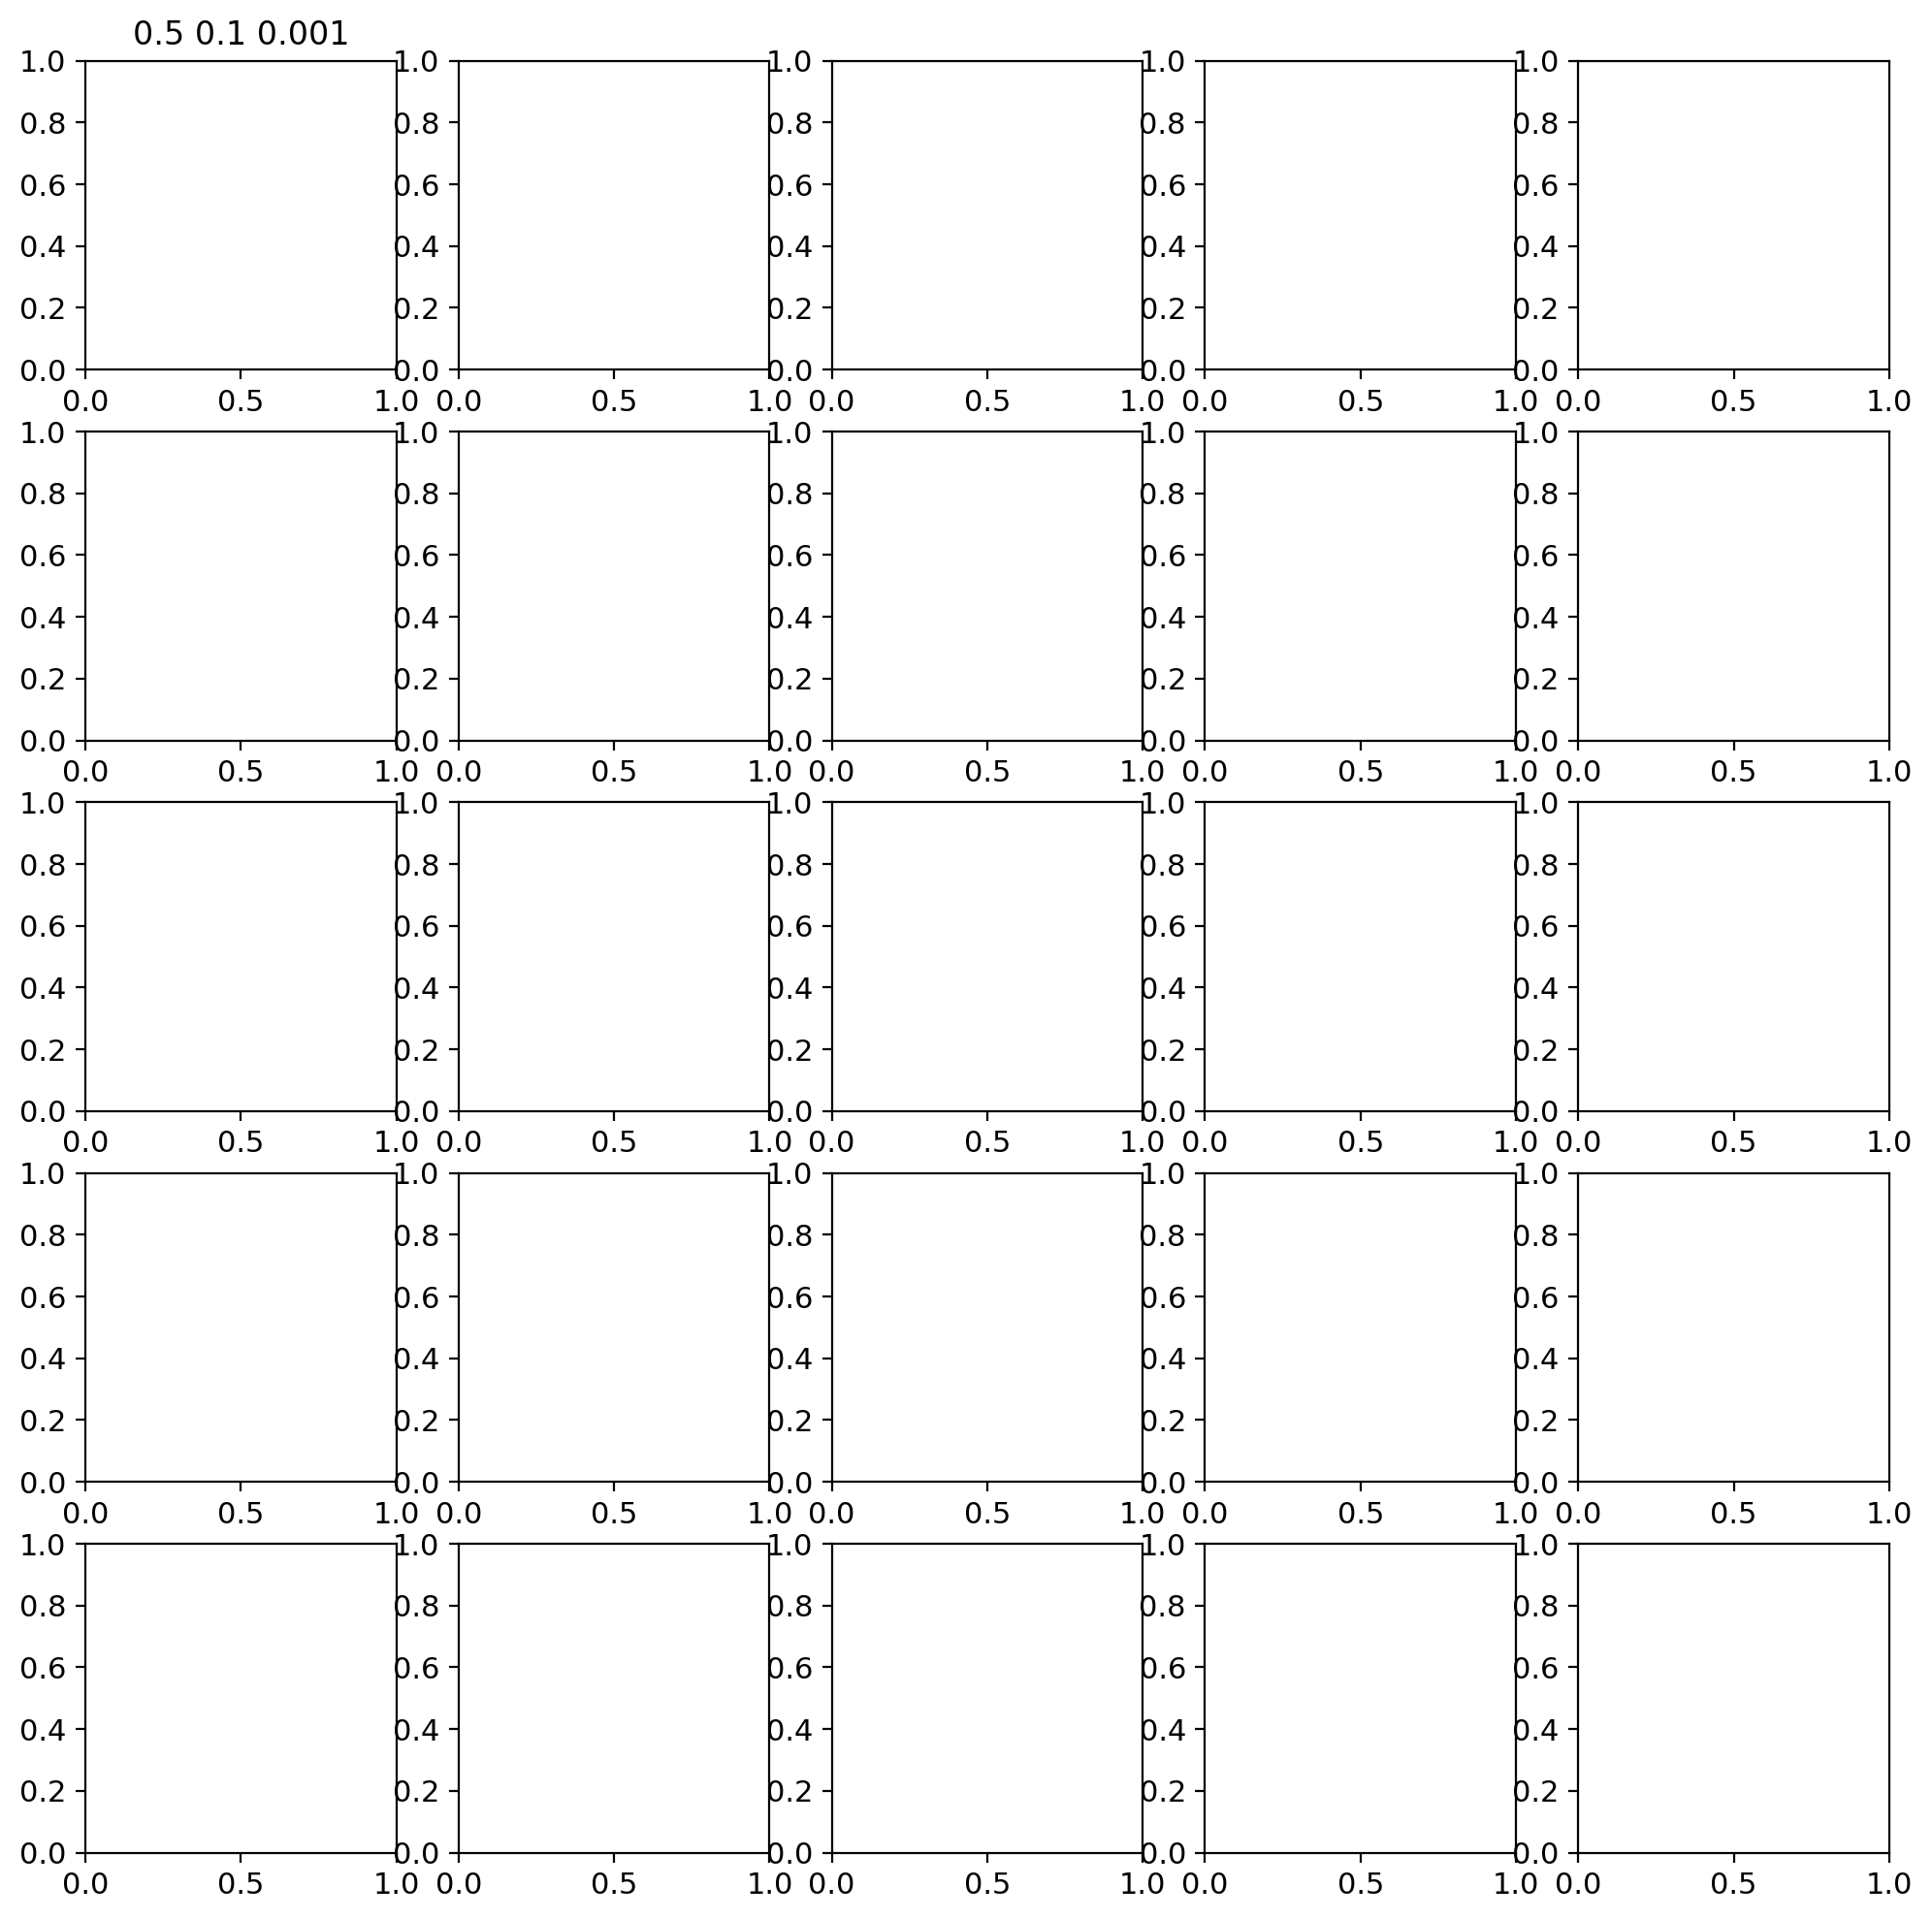

In [ ]:
for smoothness_flatfield in smoothness_flatfields:
    fig, axes = plt.subplots(
        len(smoothness_darkfields), len(sparse_cost_darkfields), figsize=(12, 12)
    )
    for i, smoothness_darkfield in enumerate(smoothness_darkfields):
        for j, sparse_cost_darkfield in enumerate(sparse_cost_darkfields):
            ax = axes[i][j]
            ax.set_title(
                f"{smoothness_flatfield} {smoothness_darkfield} {sparse_cost_darkfield}"
            )
            idx = np.where(
                (conditions_df["smoothness_flatfield"] == smoothness_flatfield)
                & (conditions_df["smoothness_darkfield"] == smoothness_darkfield)
                & (conditions_df["sparse_cost_darkfield"] == sparse_cost_darkfield)
            )
            if len(idx) > 0 and len(idx[0]) > 0:
                idx = idx[0][0]
                ax.imshow(flatfields_pu1[idx])
            ax.axis("off")

- start with the darkfield lambda large → flat darkfield
- cost functions
    - entropy
    - weight decay term (L0 norm of the flatfield Fourier component?)

- grid search as de facto starndard
- also hyperactive
- split the dataset into two, and see if the estimation is consistent